# Analysis on Stock Data

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import results csv
qresults = pd.read_csv('results.csv')
#total = pd.read_csv('total.csv')

# set some plot elements
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
qresults.head()

,company,high,hour,datetime
0,BYND,104.71,9,5/11/2021 9:55
1,BYND,106.46,10,5/11/2021 10:55
2,BYND,107.69,11,5/11/2021 11:55
3,BYND,108.84,12,5/11/2021 12:55
4,BYND,110.66,13,5/11/2021 13:45


In [3]:
qresults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   company   75 non-null     object 
 1   high      75 non-null     float64
 2   hour      75 non-null     int64  
 3   datetime  75 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.5+ KB


In [4]:
qresults.company.unique()

array(['BYND', 'DDOG', 'FB', 'NFLX', 'OKTA', 'PINS', 'SHOP', 'SNAP', 'SQ',
       'TTD'], dtype=object)

In [5]:
# Getting the counts for each stock
stockCount = qresults.groupby("company").count()
stockCount.head(10)

,high,hour,datetime
company,,,
BYND,9,9,9
DDOG,7,7,7
FB,7,7,7
NFLX,8,8,8
OKTA,7,7,7
PINS,8,8,8
SHOP,7,7,7
SNAP,7,7,7
SQ,8,8,8


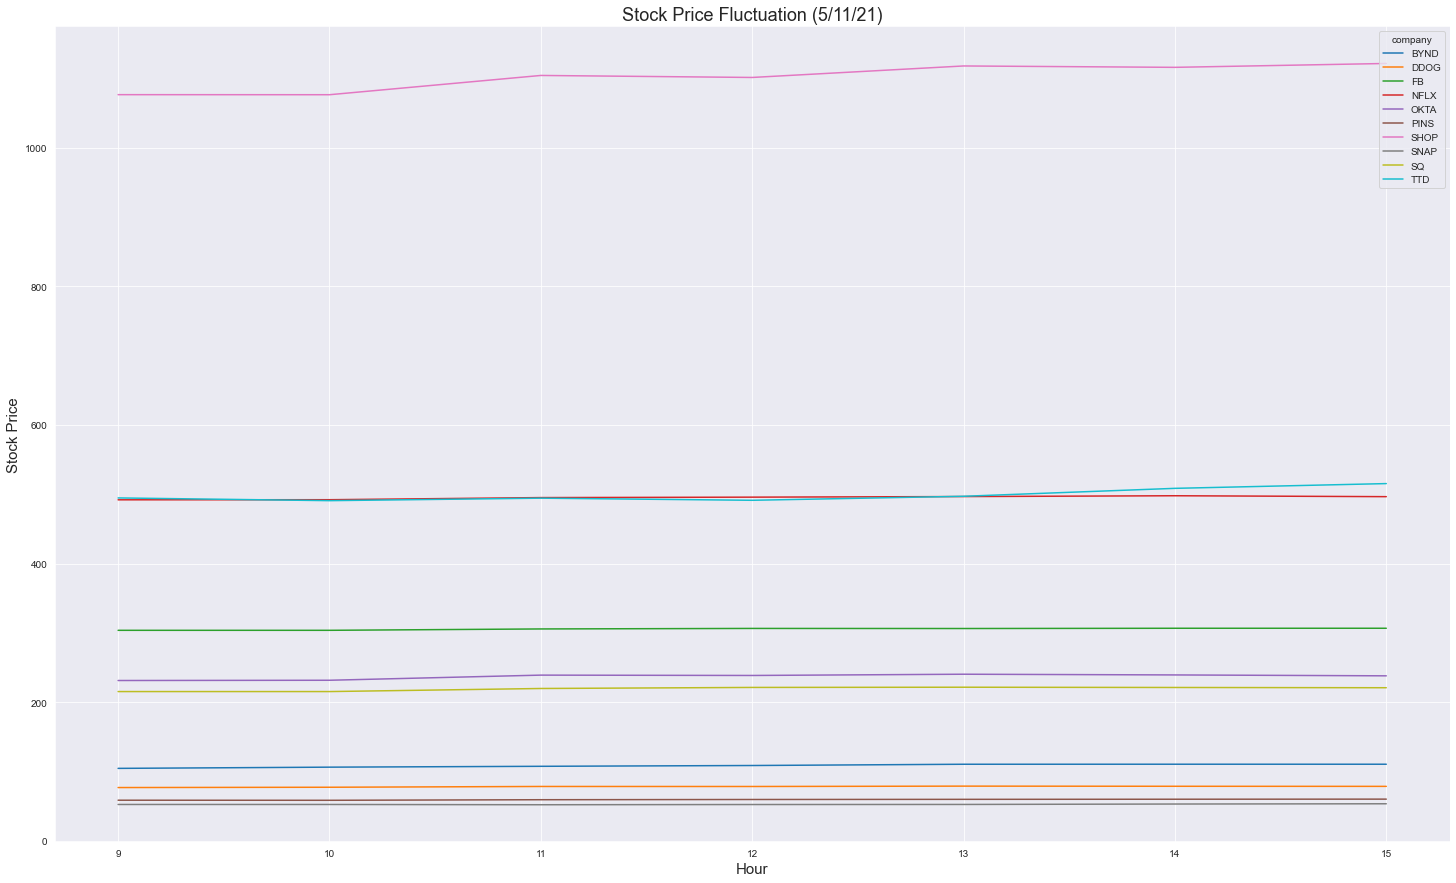

In [6]:
# Line plot of all stocks over the entire day
plt.figure(figsize=(25,15))
sns.lineplot(data=qresults, x="hour", y="high", hue="company")
plt.xlabel("Hour",fontsize=15)
plt.ylabel("Stock Price",fontsize=15)
plt.title("Stock Price Fluctuation (5/11/21)",fontsize=18)

# save plot in root folder
plt.savefig('flux.png')

We can see from the plot above that there are atleast 3 distinct group of similar priced stocks. The highest priced stock was SHOP (hovering around 1100 USD) which was atleast double the price of every other stock and the lowest priced was SNAP (hovering around 50 USD). We will differentiate between the groups based on price below.

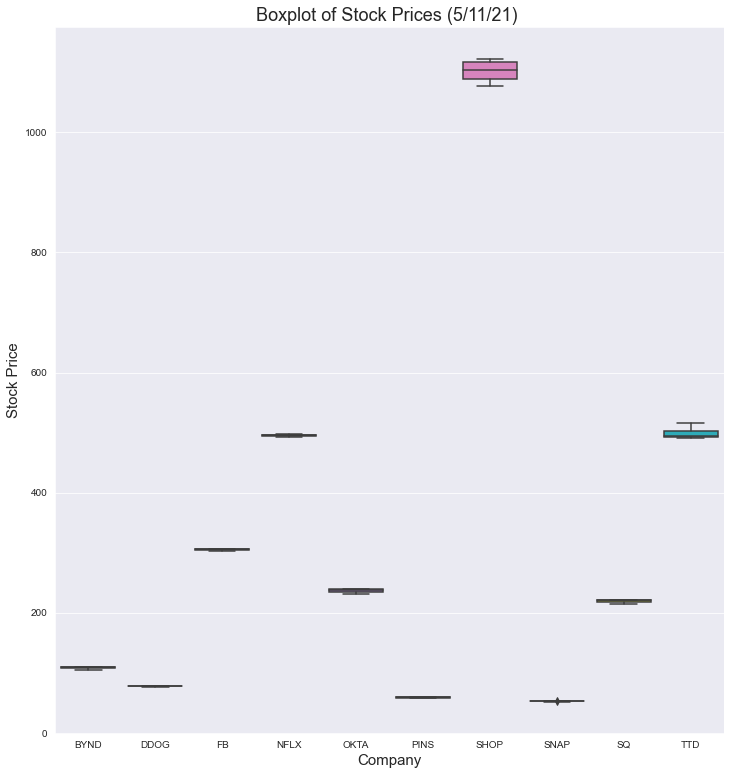

In [7]:
# Boxplot of all stock prices over the entire day
plt.figure(figsize=(12,13))
sns.boxplot(x='company',y='high',data=qresults)
plt.xlabel("Company",fontsize=15)
plt.ylabel("Stock Price",fontsize=15)
plt.title("Boxplot of Stock Prices (5/11/21) ",fontsize=18)

# save plot in root folder
plt.savefig('box.png')

From the box plot we have additional data on the each stock as well as it is easier for us to determine the groups of  similarly priced stock. We can see that for the given day SHOP not only had the highest price but also the largest fluctuation in price and therfore highest risk overall, followed by TTD and then OKTA. We can also see that the lowest priced stocks ( BYND, DDOG, PINS and SNAP) also had the lowest fluctuations and therfore the least risk.

In [8]:
# Setting the index to company
index_res = qresults.set_index('company')
index_res[:5] # checking

,high,hour,datetime
company,,,
BYND,104.71,9,5/11/2021 9:55
BYND,106.46,10,5/11/2021 10:55
BYND,107.69,11,5/11/2021 11:55
BYND,108.84,12,5/11/2021 12:55
BYND,110.66,13,5/11/2021 13:45


In [9]:
# Separate Each stock values
# Group1
nflx = index_res.loc['NFLX']
ttd = index_res.loc['TTD']
shop = index_res.loc["SHOP"]

# Group2
fb = index_res.loc['FB']
okta = index_res.loc['OKTA']
sq = index_res.loc['SQ']

# Group3
bynd = index_res.loc['BYND']
ddog = index_res.loc['DDOG']
pins = index_res.loc['PINS']
snap = index_res.loc['SNAP']

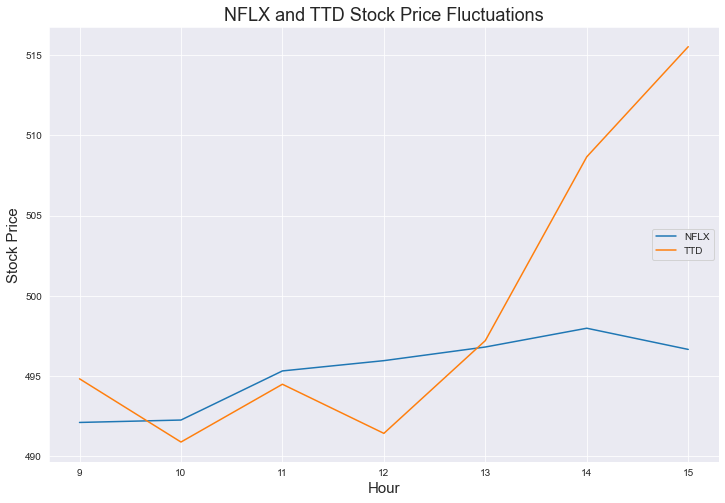

In [10]:
# Plots of group1 similar priced stocks
plt.figure(figsize=(12,8))
sns.lineplot(data=nflx, x="hour", y="high",label="NFLX")
sns.lineplot(data=ttd, x="hour", y="high",label="TTD")
plt.xlabel("Hour",fontsize=15)
plt.ylabel("Stock Price",fontsize=15)
plt.legend(loc=5)
plt.title("NFLX and TTD Stock Price Fluctuations",fontsize=18)

# save plot in root folder
plt.savefig('line1.png')

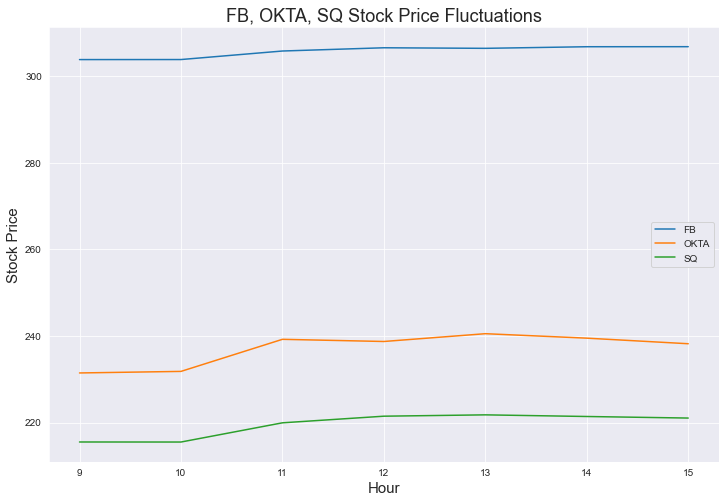

In [11]:
# Plots of group 2 similar priced stocks
plt.figure(figsize=(12,8))
sns.lineplot(data=fb, x="hour", y="high",label="FB")
sns.lineplot(data=okta, x="hour", y="high",label="OKTA")
sns.lineplot(data=sq, x="hour", y="high",label="SQ")
plt.xlabel("Hour",fontsize=15)
plt.ylabel("Stock Price",fontsize=15)
plt.legend(loc=5)
plt.title("FB, OKTA, SQ Stock Price Fluctuations",fontsize=18)

# save plot in root folder
plt.savefig('line2.png')

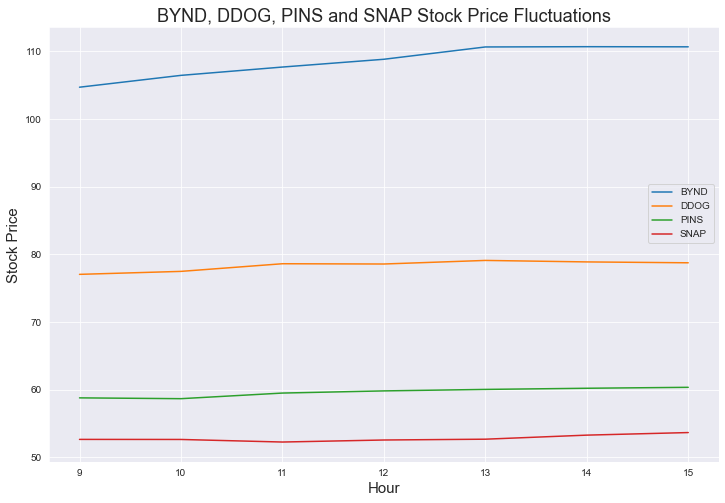

In [12]:
# Plots of group 3 similar priced stocks
plt.figure(figsize=(12,8))
sns.lineplot(data=bynd, x="hour", y="high",label="BYND")
sns.lineplot(data=ddog, x="hour", y="high",label="DDOG")
sns.lineplot(data=pins, x="hour", y="high",label="PINS")
sns.lineplot(data=snap, x="hour", y="high",label="SNAP")
plt.xlabel("Hour",fontsize=15)
plt.ylabel("Stock Price",fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.65))
plt.title("BYND, DDOG, PINS and SNAP Stock Price Fluctuations",fontsize=18)

# save plot in root folder
plt.savefig('line3.png')